### Thera Bank Personal Loan Campaign 
 
Data Description: The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign. 
 
#### Domain:
Banking 

#### Attribute Information:  
* ID: Customer ID  
* Age: Customer's age in completed years  
* Experience: #years of professional experience  
* Income: Annual income of the customer
* ZIP Code: Home Address ZIP code.  
* Family: Family size of the customer  
* CCAvg: Avg. spending on credit cards per month  
* Education: Education Level. 1:  Undergrad; 2:  Graduate; 3:  Advanced/Professional 
* Mortgage: Value of house mortgage if any. 
* Personal Loan: Did this customer accept the personal loan offered in the last campaign?  
* Securities Account: Does the customer have a securities account with the bank?  
* CD Account: Does the customer have a certificate of deposit (CD) account with the bank?  
* Online: Does the customer use internet banking facilities?  
* Credit card: Does the customer use a credit card issued by the bank? 

#### 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)

In [39]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score


In [40]:
Data = pd.read_csv("Bank_Personal_Loan_Modelling.csv")  
Data.shape

(5000, 14)

In [41]:
Data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [42]:
Data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [43]:
Data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [44]:
Data.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

#### 2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks) 
* Number of unique in each column?
* Number of people with zero mortgage?  
* Number of people with zero credit card spending per month? 
* Value counts of all categorical columns. 
* Univariate and Bivariate 
* Get data model ready


In [45]:
Data.nunique() #Number of unique in each column?

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [46]:
Data[(Data['Mortgage']==0)].Mortgage.count() #Number of people with zero mortgage?

3462

In [47]:
Data[(Data['CCAvg']==0)].CCAvg.count() #Number of people with zero credit card spending per month?

106

In [48]:
#Value counts of all categorical columns.
print("Education Columns")
Data['Education'].value_counts()

Education Columns


1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [49]:
#Value counts of all categorical columns.
print("Personal Loan Columns")
Data['Personal Loan'].value_counts()

Personal Loan Columns


0    4520
1     480
Name: Personal Loan, dtype: int64

In [50]:
#Value counts of all categorical columns.
print("Personal Loan Columns")
Data['Personal Loan'].value_counts()

Personal Loan Columns


0    4520
1     480
Name: Personal Loan, dtype: int64

In [51]:
#Value counts of all categorical columns.
print("Securities Account Columns")
Data['Securities Account'].value_counts()


Securities Account Columns


0    4478
1     522
Name: Securities Account, dtype: int64

In [52]:
#Value counts of all categorical columns.
print("CD Account Columns")
Data['CD Account'].value_counts()

CD Account Columns


0    4698
1     302
Name: CD Account, dtype: int64

In [53]:
#Value counts of all categorical columns.
print("Online Columns")
Data['Online'].value_counts()

Online Columns


1    2984
0    2016
Name: Online, dtype: int64

In [54]:
#Value counts of all categorical columns.
print("CreditCard Columns")
Data['CreditCard'].value_counts()

CreditCard Columns


0    3530
1    1470
Name: CreditCard, dtype: int64

Distribution of each variables


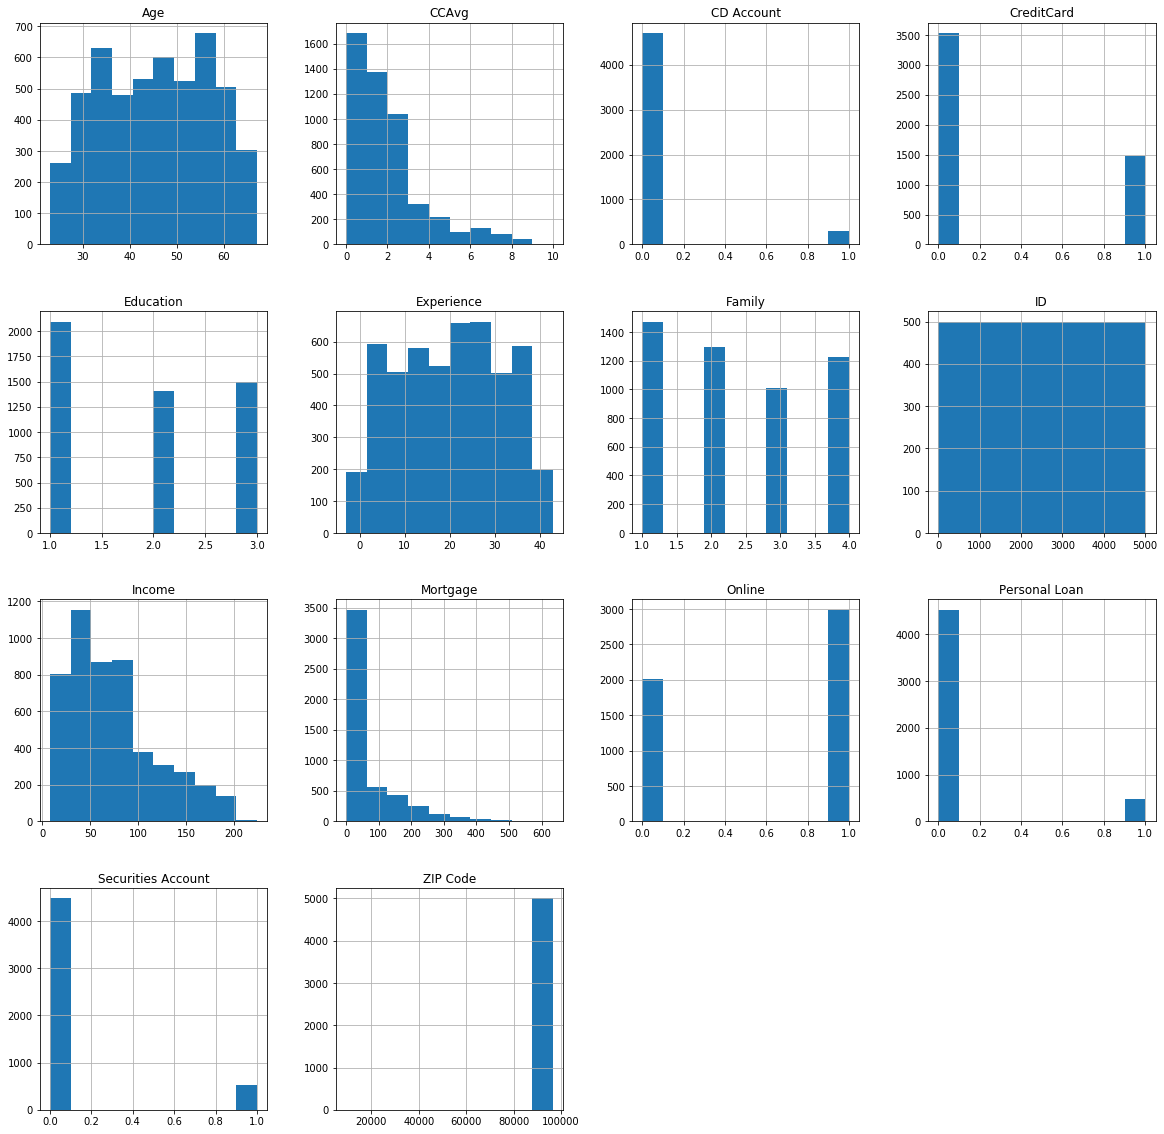

Box plot for each Variables


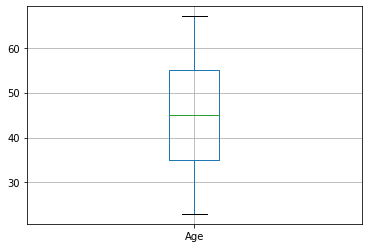

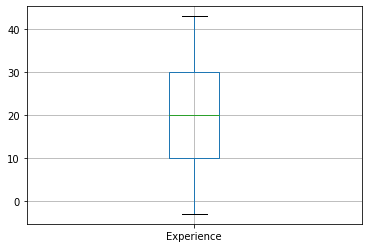

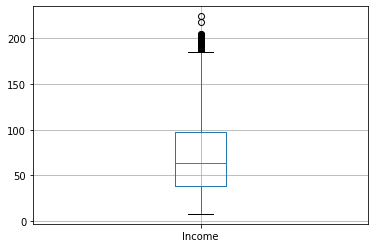

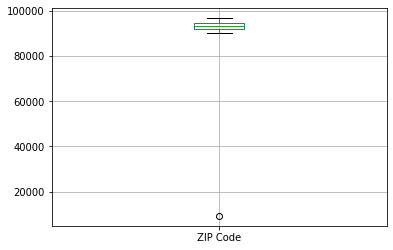

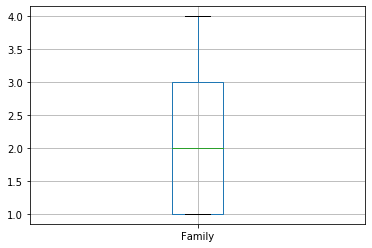

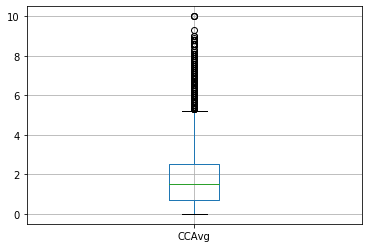

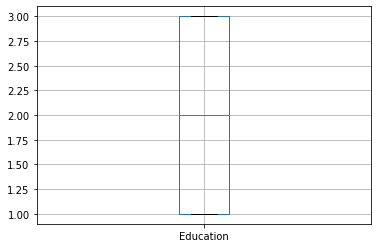

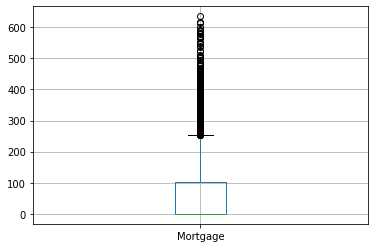

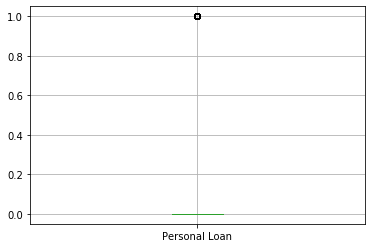

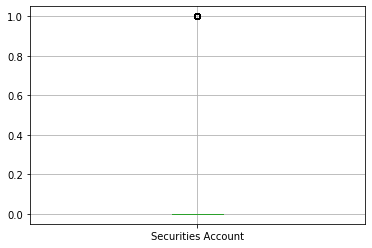

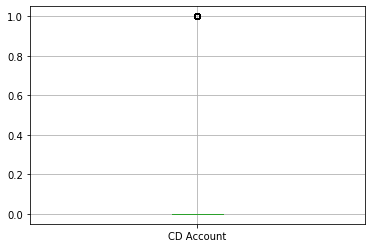

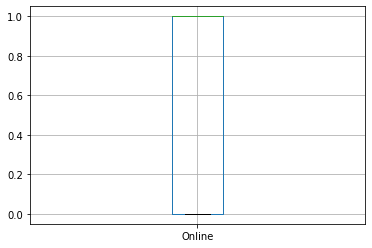

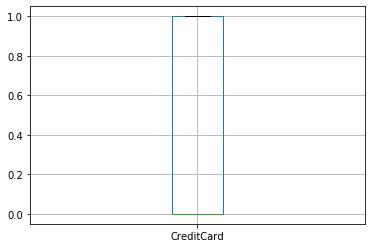

In [55]:
#Univariate
print ("Distribution of each variables")
Data.hist(figsize=(20,20))
plt.show()

print ("Box plot for each Variables")
for i in range(1,Data.shape[1]):
    Data.iloc[:,i:i+1].boxplot()
    plt.show()
    

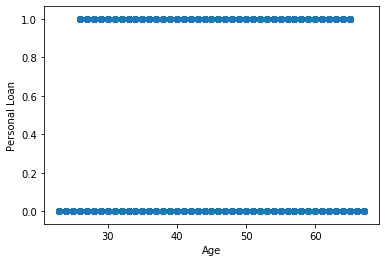

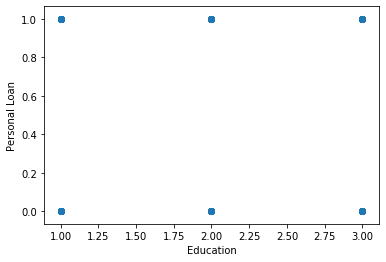

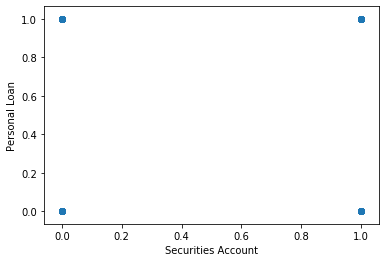

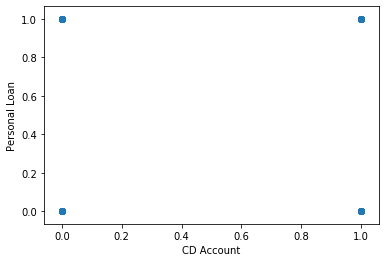

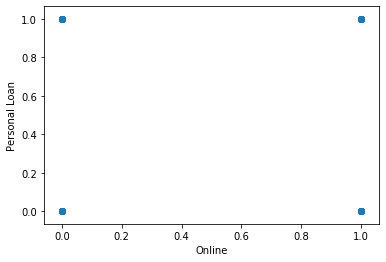

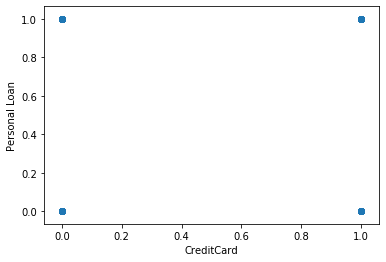

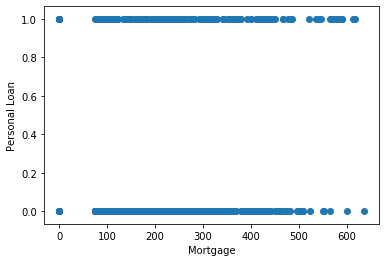

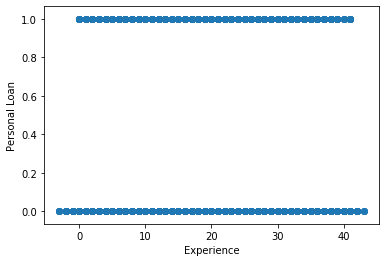

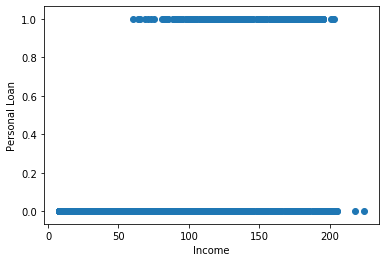

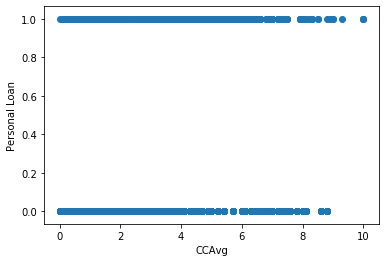

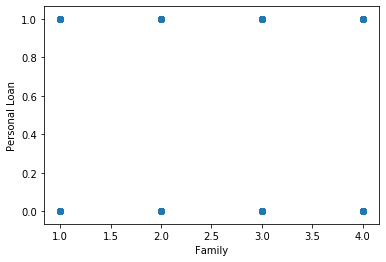

In [56]:
#Bivariate
columns = ["Age" , "Education" ,"Securities Account","CD Account","Online","CreditCard" ,"Mortgage" ,"Experience" ,"Income" ,"CCAvg" , "Family" ]
for i in columns:
    plt.scatter(Data[i] , Data["Personal Loan"] )
    plt.xlabel(i)
    plt.ylabel("Personal Loan")
    plt.show()

In [63]:
#Make the data model ready

#drop the unique columns
Data = Data.drop("ID", axis = 1)
Y = Data["Personal Loan"]
X = Data.drop("Personal Loan", axis = 1)

KeyError: "['ID'] not found in axis"

#### 3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3 )

#### 4. Use Logistic Regression model to predict the number of a customers buying personal loans. Print all the metrics related for evaluating the model performance (15 marks)

In [66]:
CBPL = LogisticRegression()

CBPL.fit(X_train , y_train)

pred_t = CBPL.predict(X_train)

print (confusion_matrix(y_train, pred_t))
print ("Accuracy Score train : " , accuracy_score(y_train, pred_t))


pred = CBPL.predict(X_test)

print (confusion_matrix(y_test, pred))
print ("Accuracy Score : " , accuracy_score(y_test, pred))

[[3162    0]
 [ 338    0]]
Accuracy Score train :  0.9034285714285715
[[1358    0]
 [ 142    0]]
Accuracy Score :  0.9053333333333333


#### 5. Give your reasoning on how can the model perform better? (10 marks) 
Hint: Check paramete


- We can drop the unnececary parameters. By take all the importance features and drop the less importance features.
- We can scale the parameters to make a range.
- Use l2 regularization to reduce over fitting

In [67]:
Y = Data["Personal Loan"]
X = Data.drop("Personal Loan", axis = 1)

scaler = MinMaxScaler()

X[["Age","Mortgage" ,"Experience" ,"Income" ,"CCAvg" , "Family"]] = scaler.fit_transform(X[["Age","Mortgage" ,"Experience" ,"Income" ,"CCAvg" , "Family"]])

In [68]:
X.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,0.045455,0.086957,0.189815,91107,1.000000,0.16,1,0.0,1,0,0,0
1,0.500000,0.478261,0.120370,90089,0.666667,0.15,1,0.0,1,0,0,0
2,0.363636,0.391304,0.013889,94720,0.000000,0.10,1,0.0,0,0,0,0
3,0.272727,0.260870,0.425926,94112,0.000000,0.27,2,0.0,0,0,0,0
4,0.272727,0.239130,0.171296,91330,1.000000,0.10,2,0.0,0,0,0,1


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.1 , random_state = 50)

CBPL = LogisticRegression(penalty='l2')

CBPL.fit(X_train , y_train)

pred_t = CBPL.predict(X_train)

print (confusion_matrix(y_train, pred_t))
print ("Accuracy Score train : " , accuracy_score(y_train, pred_t))


pred = CBPL.predict(X_test)

print (confusion_matrix(y_test, pred))
print ("Accuracy Score : " , accuracy_score(y_test, pred))

[[4064    0]
 [ 436    0]]
Accuracy Score train :  0.9031111111111111
[[456   0]
 [ 44   0]]
Accuracy Score :  0.912


#### 6. Give Business understanding of your model? (5 marks) 

- Variable with Possitive coefficient will more likely to give one with the increment of that variable

- The income is the effecting one.